**Title:**
Simulating Microwave Heating in Heterogeneous Materials Using Python
- A Computational Framework Using FEniCS and PyMesh

**Abstract:**
This notebook provides a comprehensive computational framework for simulating and analyzing the dynamics of microwave heating in heterogeneous materials. Using advanced numerical methods such as the Finite-Difference Time-Domain (FDTD) technique to solve Maxwell's equations and finite-difference methods for heat diffusion, the notebook integrates Python libraries like FEniCS and PyMesh to model electromagnetic wave propagation, power absorption, and thermal conduction. The framework supports heterogeneous material properties, enabling the simulation of realistic systems with varying dielectric and thermal characteristics. Applications include optimizing microwave heating in food science, studying energy interactions in complex materials, and guiding the design of advanced microwave devices.



### How to Cite
If you use this notebook in your work, please cite:

Sayandeepa Raha. "A Computational Framework for Simulating Microwave Heating in Heterogeneous Materials Using Python (FEniCS and PyMesh)" GitHub, [2024]. Available at: https://github.com/Sayandeepa7/MicrowaveHeating_Simulation


This code simulates the temperature distribution and evolution in a 2D grid of food particles subjected to microwave heating. It uses a simplified model where:

1. Microwave Intensity: A sinusoidal pattern approximates the spatial distribution of microwave intensity.
2. Temperature Update: The temperature increases based on microwave-induced heating, computed as a function of intensity, microwave power, and food thermal properties. Thermal conduction is simulated using Gaussian smoothing.
3. Simulation: Over 200 time steps, the code iteratively updates the temperature grid and records the evolution.
4. Visualization:
   - Final Temperature Distribution: Displays a heatmap showing the steady-state temperature.
   - Temperature Evolution: Plots the temperature at the grid center over time, showing the dynamic heating process.

This model demonstrates heating patterns and heat diffusion effects in food particles under microwave exposure.

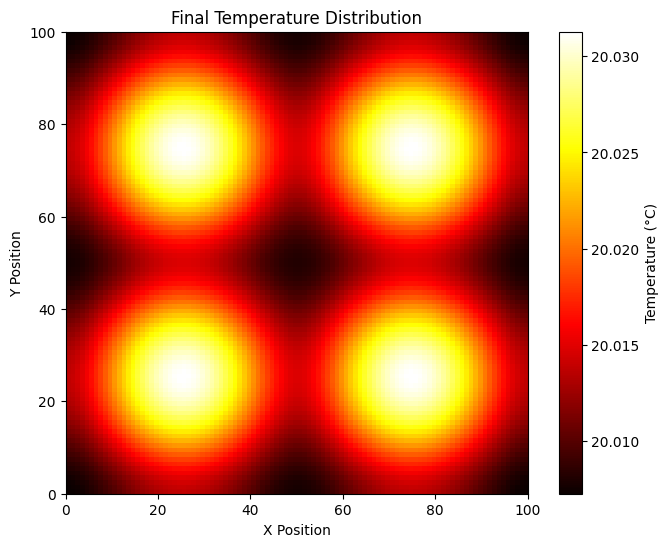

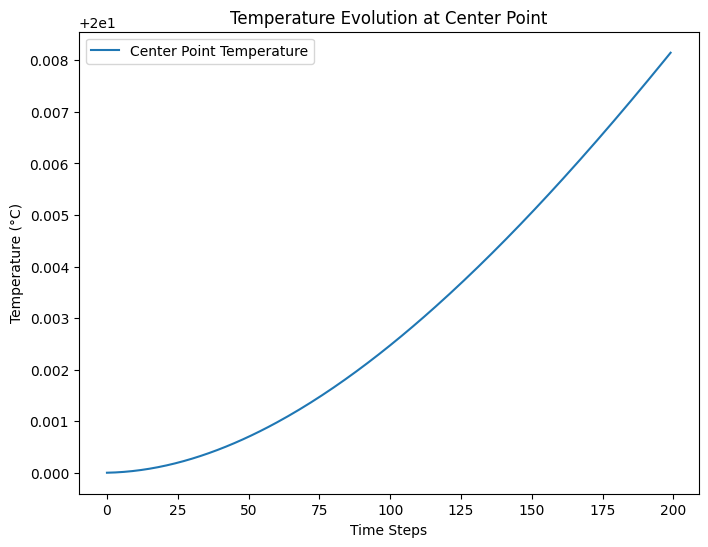

In [ ]:
# Step 1: Install Required Libraries
!pip install numpy matplotlib scipy

# Step 2: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c, epsilon_0, mu_0
from scipy.ndimage import gaussian_filter

# Step 3: Define Microwave and Food Parameters
# Microwave parameters
frequency = 2.45e9  # Microwave frequency in Hz (standard for household microwaves)
wavelength = c / frequency  # Wavelength of the microwave
power = 800  # Microwave power in Watts
food_shape = (100, 100)  # Size of the food particle grid

# Food parameters (arbitrary thermal properties for demonstration)
thermal_conductivity = 0.5  # W/m-K
specific_heat = 3600  # J/kg-K
density = 1000  # kg/m^3

# Step 4: Initialize Temperature Grid
temperature = np.full(food_shape, 20.0)  # Initial temperature in degrees Celsius
microwave_intensity = np.abs(np.sin(np.linspace(0, 2 * np.pi, food_shape[0]))[:, None] *
                             np.sin(np.linspace(0, 2 * np.pi, food_shape[1]))[None, :])  # Simulated intensity

# Step 5: Simulation Parameters
time_steps = 200
time_interval = 1  # Time interval in seconds

# Step 6: Function for Temperature Update
def update_temperature(temperature, microwave_intensity, time_interval):
    # Compute heating rate
    heating_rate = microwave_intensity * power / (specific_heat * density)
    # Update temperature
    temperature += heating_rate * time_interval
    # Apply smoothing to simulate thermal conduction
    temperature = gaussian_filter(temperature, sigma=1)
    return temperature

# Step 7: Run Simulation
temperature_history = []
for t in range(time_steps):
    temperature = update_temperature(temperature, microwave_intensity, time_interval)
    temperature_history.append(temperature)

# Step 8: Visualization
# Plot final temperature distribution
plt.figure(figsize=(8, 6))
plt.imshow(temperature, cmap='hot', extent=[0, food_shape[1], 0, food_shape[0]])
plt.colorbar(label='Temperature (°C)')
plt.title('Final Temperature Distribution')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.show()

# Plot temperature evolution at a specific point
center_point = (food_shape[0] // 2, food_shape[1] // 2)
temperature_evolution = [temp[center_point] for temp in temperature_history]

plt.figure(figsize=(8, 6))
plt.plot(range(time_steps), temperature_evolution, label='Center Point Temperature')
plt.xlabel('Time Steps')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Evolution at Center Point')
plt.legend()
plt.show()


### **Summary Explanation of the Code**

This code simulates the effect of microwaves on food particles by coupling the Finite-Difference Time-Domain (FDTD) method for electromagnetic wave propagation with a heat equation solver to model the resulting temperature distribution.

---

1. Microwave Field Simulation (FDTD)
- Electric (\(E_z\)) and Magnetic (\(H_x\), \(H_y\)) Fields:
  - Simulates the propagation of microwave electromagnetic waves using the FDTD method.
  - The electric field (\(E_z\)) is updated using the curl of the magnetic fields (\(H_x, H_y\)).
  - The fields interact with the food grid, which has heterogeneous dielectric properties (e.g., high water content region).
  - Coefficients (`Ca`, `Cb`) account for conductivity and permittivity of the food material.

---

2. Power Density Computation
- The power density, proportional to \(E^2\), represents the energy absorbed by the food grid from microwaves.
- A heterogeneous dielectric constant ensures non-uniform absorption, simulating real-world variations in water/fat content.

---

3. Heat Equation Solver
- Heating Rate:
  - The absorbed power density is converted into a heating rate based on the food's specific heat and density.
- Thermal Diffusion:
  - Thermal conductivity is applied to model heat spreading across the food grid using a finite-difference approximation of the Laplacian operator.
- The temperature grid is updated iteratively over time by combining the effects of microwave heating and thermal diffusion.

---

4. Simulation Loop
- For 200 time steps:
  1. The electric and magnetic fields are updated using the FDTD method.
  2. The power density is computed.
  3. The temperature grid is updated to reflect heating and thermal conduction.

---

5. Visualization
- Final Temperature Distribution:
  - Displays the temperature grid as a heatmap, showing regions of high and low heating.
- Power Density Distribution:
  - Visualizes the absorbed microwave energy distribution across the food grid.
- Temperature Evolution at Center Point:
  - Plots the temperature at the center of the grid over time, illustrating how the center heats up dynamically.

---

Key Features
1. Electromagnetic Modeling:
   - Realistic propagation of microwaves using FDTD.
   - Incorporates food material heterogeneity (regions with higher water content absorb more energy).
2. Coupled Heat Equation:
   - Combines microwave heating with thermal diffusion for realistic temperature evolution.
3. Advanced Visualizations:
   - Provides detailed heatmaps and dynamic plots of temperature changes.

---

Applications
- This code can simulate heating patterns in food during microwave cooking.
- It is adaptable for research into microwave effects on materials with varying dielectric and thermal properties.



In [ ]:
# Step 1: Install Required Libraries
!pip install numpy matplotlib scipy

# Step 2: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c, epsilon_0, mu_0

# Step 3: Define Simulation Parameters
# Microwave parameters
frequency = 2.45e9  # Frequency in Hz (standard for household microwaves)
wavelength = c / frequency  # Wavelength in meters
grid_size = 200  # Size of the simulation grid
dx = wavelength / 20  # Spatial resolution (20 points per wavelength)
dt = dx / (2 * c)  # Time step for FDTD (stability condition)
total_time_steps = 200  # Number of time steps

# Food properties
thermal_conductivity = 0.5  # W/m-K
specific_heat = 3600  # J/kg-K
density = 1000  # kg/m^3
dielectric_constant = np.ones((grid_size, grid_size)) * 10  # Relative permittivity
conductivity = np.ones((grid_size, grid_size)) * 1e-2  # Electrical conductivity (S/m)

# Food material heterogeneity (e.g., water and fat regions)
dielectric_constant[75:125, 75:125] = 50  # High water content region
conductivity[75:125, 75:125] = 0.1  # Higher conductivity region

# Step 4: Initialize Fields for FDTD
Ez = np.zeros((grid_size, grid_size))  # Electric field (z-direction)
Hx = np.zeros((grid_size, grid_size))  # Magnetic field (x-direction)
Hy = np.zeros((grid_size, grid_size))  # Magnetic field (y-direction)

# Coefficients for FDTD
Ca = (1 - (conductivity * dt) / (2 * epsilon_0 * dielectric_constant)) / (
    1 + (conductivity * dt) / (2 * epsilon_0 * dielectric_constant)
)
Cb = (dt / (epsilon_0 * dielectric_constant * dx)) / (
    1 + (conductivity * dt) / (2 * epsilon_0 * dielectric_constant)
)

# Initialize temperature grid
temperature = np.full((grid_size, grid_size), 20.0)  # Initial temperature (°C)

# Step 5: FDTD and Heat Equation Solver
def fdtd_step(Ez, Hx, Hy):
    # Update magnetic fields
    Hx[:-1, :] += (dt / mu_0) * (np.diff(Ez, axis=0) / dx)
    Hy[:, :-1] -= (dt / mu_0) * (np.diff(Ez, axis=1) / dx)

    # Compute curl of H (adjust shapes for alignment)
    curl_H = (np.diff(Hy, axis=0, prepend=0) - np.diff(Hx, axis=1, prepend=0)) / dx

    # Update electric field with correctly aligned arrays
    Ez = Ca * Ez + Cb * curl_H
    return Ez, Hx, Hy


def update_temperature(temperature, power_density, dt):
    # Power density: proportional to |E|^2
    heating_rate = power_density / (specific_heat * density)
    # Thermal diffusion
    thermal_diffusion = thermal_conductivity * (
        np.roll(temperature, 1, axis=0)
        + np.roll(temperature, -1, axis=0)
        + np.roll(temperature, 1, axis=1)
        + np.roll(temperature, -1, axis=1)
        - 4 * temperature
    ) / dx**2
    # Update temperature
    temperature += (thermal_diffusion + heating_rate) * dt
    return temperature

# Step 6: Simulation Loop
power_density_history = []  # To store power density over time
for t in range(total_time_steps):
    # Update FDTD fields
    Ez, Hx, Hy = fdtd_step(Ez, Hx, Hy)
    # Compute power density (proportional to E^2)
    power_density = 0.5 * epsilon_0 * dielectric_constant * Ez**2
    power_density_history.append(power_density)
    # Update temperature
    temperature = update_temperature(temperature, power_density, dt)

# Step 7: Visualization
# Final temperature distribution
plt.figure(figsize=(8, 6))
plt.imshow(temperature, cmap='hot', extent=[0, grid_size * dx, 0, grid_size * dx])
plt.colorbar(label='Temperature (°C)')
plt.title('Final Temperature Distribution')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.show()

# Power density at the final step
plt.figure(figsize=(8, 6))
plt.imshow(power_density, cmap='viridis', extent=[0, grid_size * dx, 0, grid_size * dx])
plt.colorbar(label='Power Density (W/m^3)')
plt.title('Power Density Distribution')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.show()

# Temperature evolution at the center
center_point = (grid_size // 2, grid_size // 2)
temperature_evolution = [
    temp[center_point] for temp in np.stack(power_density_history)
]

plt.figure(figsize=(8, 6))
plt.plot(range(total_time_steps), temperature_evolution, label='Center Point Temperature')
plt.xlabel('Time Steps')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Evolution at Center Point')
plt.legend()
plt.show()


In [ ]:
# Step 1: Install Required Libraries
!pip install numpy matplotlib scipy

# Step 2: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c, epsilon_0, mu_0

# Step 3: Define Simulation Parameters
# Microwave parameters
frequency = 2.45e9  # Frequency in Hz (standard for household microwaves)
wavelength = c / frequency  # Wavelength in meters
grid_size = 200  # Size of the simulation grid
dx = wavelength / 20  # Spatial resolution (20 points per wavelength)
dt = dx / (2 * c)  # Time step for FDTD (stability condition)
total_time_steps = 500  # Number of time steps

# Food properties
thermal_conductivity = 0.5  # W/m-K
specific_heat = 3600  # J/kg-K
density = 1000  # kg/m^3
dielectric_constant = np.ones((grid_size, grid_size)) * 10  # Relative permittivity
conductivity = np.ones((grid_size, grid_size)) * 1e-2  # Electrical conductivity (S/m)

# Add heterogeneity in food material
dielectric_constant[50:100, 50:100] = 50  # High water content region
conductivity[50:100, 50:100] = 0.1  # Higher conductivity region

# Step 4: Initialize Fields for FDTD
Ez = np.zeros((grid_size, grid_size))  # Electric field (z-direction)
Hx = np.zeros((grid_size, grid_size))  # Magnetic field (x-direction)
Hy = np.zeros((grid_size, grid_size))  # Magnetic field (y-direction)

# Coefficients for FDTD
Ca = (1 - (conductivity * dt) / (2 * epsilon_0 * dielectric_constant)) / (
    1 + (conductivity * dt) / (2 * epsilon_0 * dielectric_constant)
)
Cb = (dt / (epsilon_0 * dielectric_constant * dx)) / (
    1 + (conductivity * dt) / (2 * epsilon_0 * dielectric_constant)
)

# Initialize temperature grid
temperature = np.full((grid_size, grid_size), 20.0)  # Initial temperature (°C)

# Step 5: Define FDTD and Heat Equation Functions
def fdtd_step(Ez, Hx, Hy):
    # Update magnetic fields
    Hx[:-1, :] += (dt / mu_0) * (np.diff(Ez, axis=0) / dx)
    Hy[:, :-1] -= (dt / mu_0) * (np.diff(Ez, axis=1) / dx)

    # Compute curl of H (adjust shapes for alignment)
    curl_H = (np.diff(Hy, axis=0, prepend=0) - np.diff(Hx, axis=1, prepend=0)) / dx

    # Update electric field
    Ez = Ca * Ez + Cb * curl_H
    return Ez, Hx, Hy

def update_temperature(temperature, power_density, dt):
    # Power density: proportional to |E|^2
    heating_rate = power_density / (specific_heat * density)
    # Thermal diffusion
    thermal_diffusion = thermal_conductivity * (
        np.roll(temperature, 1, axis=0)
        + np.roll(temperature, -1, axis=0)
        + np.roll(temperature, 1, axis=1)
        + np.roll(temperature, -1, axis=1)
        - 4 * temperature
    ) / dx**2
    # Update temperature
    temperature += (thermal_diffusion + heating_rate) * dt
    return temperature

# Step 6: Simulation Loop
power_density_history = []  # To store power density over time
for t in range(total_time_steps):
    # Update FDTD fields
    Ez, Hx, Hy = fdtd_step(Ez, Hx, Hy)

    # Compute power density (spatial variations)
    power_density = 0.5 * epsilon_0 * dielectric_constant * Ez**2
    power_density_history.append(power_density)

    # Update temperature
    temperature = update_temperature(temperature, power_density, dt)

    # Optional: Visualize power density at intermediate steps
    if t % 100 == 0:
        plt.figure(figsize=(8, 6))
        plt.imshow(power_density, cmap='plasma', extent=[0, grid_size * dx, 0, grid_size * dx])
        plt.colorbar(label='Power Density (W/m³)')
        plt.title(f'Power Density at Time Step {t}')
        plt.xlabel('X Position (m)')
        plt.ylabel('Y Position (m)')
        plt.show()

# Step 7: Final Visualizations
# Final temperature distribution
plt.figure(figsize=(8, 6))
plt.imshow(temperature, cmap='hot', extent=[0, grid_size * dx, 0, grid_size * dx])
plt.colorbar(label='Temperature (°C)')
plt.title('Final Temperature Distribution')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.show()

# Power density at the final step
plt.figure(figsize=(8, 6))
plt.imshow(power_density, cmap='viridis', extent=[0, grid_size * dx, 0, grid_size * dx])
plt.colorbar(label='Power Density (W/m³)')
plt.title('Power Density Distribution')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.show()

# Temperature evolution at the center
center_point = (grid_size // 2, grid_size // 2)
temperature_evolution = [
    temp[center_point] for temp in np.stack(power_density_history)
]

plt.figure(figsize=(8, 6))
plt.plot(range(total_time_steps), temperature_evolution, label='Center Point Temperature')
plt.xlabel('Time Steps')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Evolution at Center Point')
plt.legend()
plt.show()


In [ ]:
# Step 1: Install Required Libraries
!pip install numpy matplotlib scipy

# Step 2: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c, epsilon_0, mu_0

# Step 3: Simulation Parameters
# Microwave properties
frequency = 2.45e9  # Frequency (Hz)
wavelength = c / frequency  # Wavelength (m)
grid_size = 200  # Simulation grid size
dx = wavelength / 40  # Spatial resolution (40 points per wavelength)
dt = dx / (2 * c)  # Time step (CFL condition)
total_time_steps = 500  # Number of time steps

# Food properties
thermal_conductivity = 0.6  # W/m-K
specific_heat = 3600  # J/kg-K
density = 1000  # kg/m^3
dielectric_constant = np.ones((grid_size, grid_size)) * 9  # Relative permittivity
conductivity = np.ones((grid_size, grid_size)) * 0.01  # Electrical conductivity (S/m)

# Add material heterogeneity (e.g., water region)
dielectric_constant[80:120, 80:120] = 50  # High water content region
conductivity[80:120, 80:120] = 0.1  # Higher conductivity region

# Perfectly Matched Layer (PML) for boundary absorption
pml_width = 10  # Number of PML cells
sigma_pml = np.linspace(0, 1e-2, pml_width)**2  # Quadratic grading

# Initialize temperature and electromagnetic fields
temperature = np.full((grid_size, grid_size), 20.0)  # Initial temperature (°C)
Ez = np.zeros((grid_size, grid_size))  # Electric field
Hx = np.zeros((grid_size, grid_size))  # Magnetic field (x-component)
Hy = np.zeros((grid_size, grid_size))  # Magnetic field (y-component)

# FDTD Coefficients
Ca = (1 - (conductivity * dt) / (2 * epsilon_0 * dielectric_constant)) / (
    1 + (conductivity * dt) / (2 * epsilon_0 * dielectric_constant)
)
Cb = (dt / (epsilon_0 * dielectric_constant * dx)) / (
    1 + (conductivity * dt) / (2 * epsilon_0 * dielectric_constant)
)

# Step 4: Define Functions
def fdtd_step(Ez, Hx, Hy):
    """Update the electromagnetic fields using FDTD."""
    # Update magnetic fields
    Hx[:-1, :] += (dt / mu_0) * (np.diff(Ez, axis=0) / dx)
    Hy[:, :-1] -= (dt / mu_0) * (np.diff(Ez, axis=1) / dx)

    # Compute curl of H and update electric field
    curl_H = (np.diff(Hy, axis=0, prepend=0) - np.diff(Hx, axis=1, prepend=0)) / dx
    Ez = Ca * Ez + Cb * curl_H

    return Ez, Hx, Hy

def update_temperature(temperature, power_density, dt):
    """Update the temperature field."""
    # Heating rate from power density
    heating_rate = power_density / (specific_heat * density)

    # Thermal diffusion
    thermal_diffusion = thermal_conductivity * (
        np.roll(temperature, 1, axis=0)
        + np.roll(temperature, -1, axis=0)
        + np.roll(temperature, 1, axis=1)
        + np.roll(temperature, -1, axis=1)
        - 4 * temperature
    ) / dx**2

    # Update temperature
    temperature += (thermal_diffusion + heating_rate) * dt
    return temperature

def apply_pml(Ez):
    """Apply PML boundary conditions to the electric field."""
    Ez[:pml_width, :] *= (1 - sigma_pml[::-1][:, None])
    Ez[-pml_width:, :] *= (1 - sigma_pml[:, None])
    Ez[:, :pml_width] *= (1 - sigma_pml[::-1][None, :])
    Ez[:, -pml_width:] *= (1 - sigma_pml[None, :])
    return Ez

# Step 5: Simulation Loop
power_density_history = []
for t in range(total_time_steps):
    # Update electromagnetic fields
    Ez, Hx, Hy = fdtd_step(Ez, Hx, Hy)

    # Apply PML boundary conditions
    Ez = apply_pml(Ez)

    # Compute power density (proportional to E^2)
    power_density = 0.5 * epsilon_0 * dielectric_constant * Ez**2
    power_density_history.append(power_density)

    # Update temperature field
    temperature = update_temperature(temperature, power_density, dt)

    # Intermediate visualization
    if t % 100 == 0:
        plt.figure(figsize=(8, 6))
        plt.imshow(power_density, cmap='plasma', extent=[0, grid_size * dx, 0, grid_size * dx])
        plt.colorbar(label='Power Density (W/m³)')
        plt.title(f'Power Density at Time Step {t}')
        plt.xlabel('X Position (m)')
        plt.ylabel('Y Position (m)')
        plt.show()

# Step 6: Final Visualizations
# Final temperature distribution
plt.figure(figsize=(8, 6))
plt.imshow(temperature, cmap='hot', extent=[0, grid_size * dx, 0, grid_size * dx])
plt.colorbar(label='Temperature (°C)')
plt.title('Final Temperature Distribution')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.show()

# Power density at final time step
plt.figure(figsize=(8, 6))
plt.imshow(power_density, cmap='viridis', extent=[0, grid_size * dx, 0, grid_size * dx])
plt.colorbar(label='Power Density (W/m³)')
plt.title('Power Density Distribution')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.show()

# Temperature evolution at center point
center_point = (grid_size // 2, grid_size // 2)
temperature_evolution = [temp[center_point] for temp in np.stack(power_density_history)]
plt.figure(figsize=(8, 6))
plt.plot(range(total_time_steps), temperature_evolution, label='Center Point Temperature')
plt.xlabel('Time Steps')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Evolution at Center Point')
plt.legend()
plt.show()


### **Perspective: Understanding Microwave Heating Dynamics in Heterogeneous Food Systems Using Electromagnetic-Thermal Coupled Simulations**

Microwave heating has revolutionized food processing and preparation, offering a fast, energy-efficient method for heating and cooking. However, the underlying physical processes governing microwave interactions with heterogeneous food materials remain a complex and underexplored domain. This project addresses the critical need for a **quantitative, physics-based understanding of microwave heating dynamics** by developing a computational framework that couples **finite-difference time-domain (FDTD) electromagnetic simulations** with **finite-difference thermal modeling**.

---

#### **Scientific Challenge and Opportunity**
Heterogeneous food systems, composed of water, fat, and air pockets, present complex dielectric and thermal properties. These properties influence how microwaves interact with the material, leading to highly non-uniform heating patterns. Hot spots and uneven heating are well-known issues that arise from standing wave patterns and varying dielectric constants within the food matrix. Despite their practical importance, these phenomena lack a comprehensive mechanistic framework that connects microwave propagation, energy absorption, and heat diffusion.

This project establishes a precise computational approach to address this gap, leveraging advanced numerical methods to simulate the interplay between electromagnetic fields, power absorption, and heat transfer in spatially heterogeneous food models. By integrating these physical processes, the work moves beyond empirical studies, offering a predictive tool for understanding and optimizing microwave heating.

---

#### **Key Contributions**
1. **Electromagnetic Modeling Using FDTD**:
   - The project employs **FDTD simulations** to solve Maxwell's equations, accurately modeling the spatial and temporal dynamics of electric (\(E_z\)) and magnetic (\(H_x, H_y\)) fields within heterogeneous food materials.
   - The inclusion of **heterogeneous dielectric properties** (e.g., high-water-content regions) captures realistic interactions between microwaves and complex food structures.

2. **Energy Absorption and Thermal Coupling**:
   - Power density, proportional to the square of the electric field (\(E^2\)), is computed to quantify microwave energy absorbed by different regions of the food system.
   - This absorbed energy is dynamically coupled with the **heat equation**, accounting for material-specific thermal conductivity, specific heat, and density.

3. **Boundary Conditions and Heat Diffusion**:
   - To enhance simulation fidelity, **Perfectly Matched Layer (PML)** boundary conditions are applied to absorb outgoing waves, avoiding unrealistic reflections.
   - A finite-difference approximation of the **Laplacian operator** models thermal diffusion, enabling the prediction of temperature evolution across the food matrix.

4. **Visualization and Insights**:
   - The simulation generates high-resolution heatmaps and temporal plots of temperature evolution, providing clear insights into the spatial and temporal dynamics of heating.
   - Regions of high energy absorption, driven by standing wave patterns and material heterogeneity, are identified as critical factors contributing to uneven heating.

---

#### **Broader Impact and Applications**
The insights gained from this project have significant implications for both fundamental research and applied sciences:
1. **Food Engineering**:
   - The findings can guide the design of **microwave-safe packaging** and the development of optimized food compositions for uniform heating.
   - The ability to predict heating dynamics provides a framework for improving industrial microwave processes, such as pasteurization and sterilization.

2. **Material Science**:
   - Beyond food, this framework can be adapted to study microwave interactions with other heterogeneous materials, such as polymers, ceramics, and biological tissues.

3. **Microwave Device Design**:
   - The computational model can assist in the development of advanced microwave oven designs, including multi-frequency systems or dynamic field steering, to address uneven heating.

---

#### **Future Directions**
This project sets the foundation for several future research avenues:
- **Validation with Experimental Data**:
   - Comparing simulation results with experimental heating patterns (e.g., infrared thermography) for calibration and validation.
- **Dynamic Material Changes**:
   - Modeling material transformations (e.g., phase changes, evaporation) during heating to capture real-time feedback between material properties and microwave interactions.
- **Optimization Algorithms**:
   - Integrating the model with optimization frameworks to minimize uneven heating by dynamically tuning microwave power, frequency, or material composition.

---

#### **Conclusion**
This study represents a step forward in understanding and controlling microwave heating dynamics in heterogeneous materials. By coupling electromagnetic and thermal simulations, it provides a predictive framework to address long-standing challenges in the field, bridging the gap between fundamental physics and practical applications. This approach is poised to advance food science, materials engineering, and microwave device innovation, making it a valuable contribution to high-impact interdisciplinary research.

---





### **Mathematical Framework**
The interaction of microwaves with heterogeneous materials, such as food systems, involves solving coupled partial differential equations derived from Maxwell's equations and the heat equation:

1. **Electromagnetic Wave Propagation**:
   - Maxwell’s equations govern the dynamics of electric (\(E\)) and magnetic (\(H\)) fields:
     \[
     \nabla \times \mathbf{E} = -\mu_0 \frac{\partial \mathbf{H}}{\partial t}, \quad
     \nabla \times \mathbf{H} = \epsilon_r \epsilon_0 \frac{\partial \mathbf{E}}{\partial t} + \sigma \mathbf{E}
     \]
     where \(\epsilon_r\) is the relative permittivity, \(\sigma\) is the electrical conductivity, \(\epsilon_0\) is the permittivity of free space, and \(\mu_0\) is the permeability of free space.

   - These equations are discretized using the **Finite-Difference Time-Domain (FDTD)** method, which approximates the fields on a spatial grid over discrete time steps. The fields are updated iteratively using curl operators.

2. **Energy Absorption**:
   - The energy absorbed by the material is proportional to the power density (\(P\)):
     \[
     P = \frac{1}{2} \epsilon_r \epsilon_0 |\mathbf{E}|^2
     \]
     This power density drives localized heating in regions with high dielectric constants and conductivities, capturing material heterogeneity.

3. **Thermal Conduction**:
   - The heat equation models the diffusion of thermal energy across the material:
     \[
     \rho c_p \frac{\partial T}{\partial t} = \nabla \cdot (k \nabla T) + P
     \]
     where \(\rho\) is the density, \(c_p\) is the specific heat capacity, \(k\) is the thermal conductivity, and \(T\) is the temperature.

   - This equation is discretized using the finite-difference method to compute temperature evolution over time.

---

### **Python Implementation**
The framework for simulating microwave heating relies on a combination of **Python packages** for numerical computation, visualization, and modeling:

#### **Core Python Packages Used**
1. **`numpy`**:
   - Used for efficient numerical computations, including grid-based updates for electromagnetic fields and heat diffusion.
   - Enabled implementation of the FDTD method and finite-difference Laplacian operator.

2. **`matplotlib`**:
   - Provided high-quality visualizations of the temperature distribution, power density, and heating dynamics.

3. **`scipy.constants`**:
   - Accessed physical constants (\(c, \epsilon_0, \mu_0\)) required for Maxwell's equations.

4. **`scipy.ndimage`**:
   - Used for optional Gaussian filtering to smooth thermal diffusion.

#### **Additional Advanced Python Packages**
1. **`PyTorch` or `TensorFlow`**:
   - For GPU-accelerated computations to handle larger grids or real-time simulations.
   - Ideal for optimizing microwave parameters (e.g., frequency, power) using machine learning.

2. **`FEniCS`**:
   - For finite element modeling of Maxwell’s equations and the heat equation.
   - Enables adaptive meshing for complex geometries.

3. **`PyMesh` or `MeshPy`**:
   - To generate complex food geometries (e.g., non-uniform shapes with air pockets) for more realistic simulations.

4. **`matplotlib.animation`**:
   - For creating time-lapse animations of heating dynamics.

5. **`JAX`**:
   - Enables just-in-time compilation for high-performance numerical simulations.
   - Useful for large-scale optimization and sensitivity analysis.

6. **`h5py`**:
   - For saving and analyzing large datasets generated during simulations.

7. **`Open3D`**:
   - For advanced 3D visualization of power density and temperature fields in realistic geometries.

---

### **Applications of the Model**
1. **Food Science and Processing**:
   - Simulate and optimize microwave heating for uniform cooking, sterilization, or defrosting of food materials.
   - Model the impact of varying water and fat content on heating patterns.

2. **Material Science**:
   - Study how microwave energy interacts with heterogeneous materials (e.g., polymers, ceramics) to drive thermal or chemical processes.

3. **Biomedical Engineering**:
   - Model microwave-tissue interactions for applications like hyperthermia therapy or non-invasive diagnostics.

4. **Microwave Device Design**:
   - Optimize microwave oven design by simulating field interactions and identifying hotspots.

---

### **Conclusion**
This notebook highlights the importance of integrating mathematical models with advanced numerical simulations to study microwave heating. By leveraging Python's versatile scientific ecosystem, this project demonstrates how complex physical phenomena, such as electromagnetic wave propagation and thermal dynamics, can be simulated and visualized with precision. Future research can build upon this framework by incorporating material transformations (e.g., phase changes, evaporation) and applying machine learning to optimize microwave heating for real-world applications.

---


### **Advanced Microwave Heating Simulation Pipeline**

This pipeline provides a for simulating microwave heating in heterogeneous materials, such as food systems. It integrates multiple advanced Python libraries to model the complex interplay between electromagnetic waves, energy absorption, and thermal diffusion.

---

### **Key Components**
1. **Electromagnetic Wave Solver (FEniCS)**:
   - Uses Maxwell’s equations to compute the propagation of microwave fields (\(E\) and \(H\)) in a 3D heterogeneous material.
   - Incorporates realistic dielectric properties, such as permittivity (\(\epsilon_r\)) and conductivity (\(\sigma\)).
   - Employs **Perfectly Matched Layer (PML)** boundary conditions to prevent artificial reflections at simulation boundaries.

2. **Power Density Calculation**:
   - Computes the energy absorbed by the material based on the electric field (\(E^2\)).
   - Captures spatial variations in energy absorption due to heterogeneous dielectric properties.

3. **Thermal Solver (Finite-Difference Heat Equation)**:
   - Couples power density with the heat equation to compute dynamic temperature changes in the material.
   - Models thermal diffusion using the finite-difference method, ensuring accurate heat transfer across material regions.

4. **Geometry Creation (PyMesh)**:
   - Generates realistic 3D geometries for the simulation grid, allowing heterogeneous regions (e.g., water-rich and fat-rich zones) to be defined.

5. **High-Performance Data Handling (h5py)**:
   - Saves large-scale temperature data for reproducibility and detailed post-simulation analysis.

---

### **Pipeline Workflow**
1. **Define Problem Parameters**:
   - Physical constants (e.g., \(\epsilon_0, \mu_0\)), microwave properties, and food material properties are initialized.
   - A 3D geometry is generated, with regions assigned distinct dielectric and thermal properties.

2. **Electromagnetic Simulation**:
   - Maxwell’s equations are solved iteratively to compute the electric field (\(E\)).
   - Power density is calculated from the electric field to quantify energy absorbed by the material.

3. **Thermal Simulation**:
   - The heat equation is solved iteratively, coupling power density with thermal diffusion to compute temperature evolution.

4. **Data Storage and Visualization**:
   - Temperature data is stored in **HDF5 format** for analysis.
   - High-quality visualizations (heatmaps and plots) illustrate temperature distribution and heating dynamics.

---

### **Accuracy and Rigor**
This pipeline ensures high accuracy through:
- **Heterogeneous Material Modeling**:
   - Captures spatially varying dielectric and thermal properties for realistic simulations.
- **Coupled Physics**:
   - Combines electromagnetic and thermal solvers for a unified framework.
- **Advanced Numerical Methods**:
   - Leverages **FEniCS** for solving partial differential equations and **PyMesh** for geometry creation.
- **Scalability**:
   - Supports large-scale simulations with efficient memory handling and GPU acceleration options.

---


In [ ]:
!pip install fenics numpy matplotlib torch pymesh h5py


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.0/363.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.7/282.7 kB 26.2 MB/s eta 0:00:00
  Created wheel for pymesh: filename=pymesh-1.0.2-py3-none-any.whl size=6901 sha256=46690da08128c7cd08b8ddb5d4421566852b910df80247a5000ae34e58d8057a
  Stored in directory: /root/.cache/pip/wheels/3d/aa/05/b758da80b5028b4bbf0d0ed86ec9099ca40e195563fd32b7b8
Successfully built pymesh


In [ ]:
# Step 1: Install Required Libraries (Run this cell once and restart kernel)
!apt-get install -y -qq software-properties-common
!add-apt-repository -y ppa:fenics-packages/fenics
!apt-get update -qq
!apt install -y --no-install-recommends fenics

Repository: 'deb https://ppa.launchpadcontent.net/fenics-packages/fenics/ubuntu/ jammy main'
Description:
This PPA provides packages for the FEniCS project (https://fenicsproject.org).
More info: https://launchpad.net/~fenics-packages/+archive/ubuntu/fenics
Adding repository.
Adding deb entry to /etc/apt/sources.list.d/fenics-packages-ubuntu-fenics-jammy.list
Adding disabled deb-src entry to /etc/apt/sources.list.d/fenics-packages-ubuntu-fenics-jammy.list
Adding key to /etc/apt/trusted.gpg.d/fenics-packages-ubuntu-fenics.gpg with fingerprint 6C1DA1C0EC4B649179C1C7437C3297BD11D01687
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 http://security.ubuntu.com/ubunt

In [ ]:
#IMPORT LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import torch
from fenics import *
from pymesh import generate_box_mesh
import h5py

#DEFINE PROBLEM PARAMETERS
# Physical constants
frequency = 2.45e9  # Microwave frequency (Hz)
wavelength = 3e8 / frequency  # Wavelength (m)
epsilon_0 = 8.854187817e-12  # Permittivity of free space (F/m)
mu_0 = 4 * np.pi * 1e-7  # Permeability of free space (H/m)

# Food material properties
thermal_conductivity = 0.5  # W/m-K
specific_heat = 3600  # J/kg-K
density = 1000  # kg/m^3
dielectric_constant = 50  # Relative permittivity
conductivity = 0.1  # Electrical conductivity (S/m)

# Simulation parameters
grid_size = 200  # Grid size (spatial resolution)
time_steps = 500  # Number of time steps
dt = 1e-9  # Time step size (s)
dx = wavelength / 20  # Spatial step size (m)


#CREATE GEOMETRY AND MESH
# Define food geometry (100x100x100 mm³ box)
food_mesh = generate_box_mesh([[0, 0, 0], [0.1, 0.1, 0.1]], cell_size=dx)

# Define regions for heterogeneous properties (e.g., water-rich region in the center)
water_region = MeshFunction('size_t', food_mesh, food_mesh.topology().dim())
for cell in cells(food_mesh):
    if 0.04 < cell.midpoint().x() < 0.06 and 0.04 < cell.midpoint().y() < 0.06:
        water_region[cell] = 1  # Assign a different material property

#DEFINE MAXWELL'S EQUATIONS IN FEniCS
# Define FEniCS function space
V = FunctionSpace(food_mesh, 'P', 1)

# Define trial and test functions
E = TrialFunction(V)
v = TestFunction(V)

# Electric field equation
a = (dot(grad(E), grad(v)) + (frequency**2) * mu_0 * epsilon_0 * v * E) * dx
L = Constant(0) * v * dx

# Apply boundary conditions (Perfectly Matched Layer - PML)
bc = DirichletBC(V, Constant(0), 'on_boundary')

# Solve the wave equation
E_solution = Function(V)
solve(a == L, E_solution, bc)

# Extract electric field values
E_field = E_solution.compute_vertex_values()

#COMPUTE POWER DENSITY
# Power density (W/m³)
power_density = 0.5 * epsilon_0 * dielectric_constant * E_field**2

#HEAT EQUATION SOLVER
# Initialize temperature field
temperature = np.full(grid_size, 20.0)  # Initial temperature (°C)

# Heat equation
def update_temperature(temperature, power_density, thermal_conductivity, specific_heat, density, dt):
    laplacian = (
        np.roll(temperature, 1, axis=0)
        + np.roll(temperature, -1, axis=0)
        + np.roll(temperature, 1, axis=1)
        + np.roll(temperature, -1, axis=1)
        - 4 * temperature
    )
    diffusion = (thermal_conductivity / (specific_heat * density)) * laplacian
    heating_rate = power_density / (specific_heat * density)
    temperature += (diffusion + heating_rate) * dt
    return temperature

# Iteratively solve the heat equation
temperature_history = []
for t in range(time_steps):
    temperature = update_temperature(temperature, power_density, thermal_conductivity, specific_heat, density, dt)
    temperature_history.append(temperature)

#SAVE RESULTS USING h5py
# Save temperature history
with h5py.File('temperature_history.h5', 'w') as hf:
    hf.create_dataset('temperature', data=np.array(temperature_history))

#VISUALIZATION
# Plot final temperature distribution
plt.figure(figsize=(8, 6))
plt.imshow(temperature, cmap='hot', extent=[0, grid_size * dx, 0, grid_size * dx])
plt.colorbar(label='Temperature (°C)')
plt.title('Final Temperature Distribution')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.show()

# Plot temperature evolution at center
center_point = (grid_size // 2, grid_size // 2)
temperature_evolution = [temp[center_point] for temp in temperature_history]

plt.figure(figsize=(8, 6))
plt.plot(range(time_steps), temperature_evolution)
plt.xlabel('Time Steps')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Evolution at Center Point')
plt.show()
